---
---
Recitation 10: Machine Learning I

Applied Data Science using Python

New York University, Abu Dhabi

Dated: 09th Nov 2023

---
---
#Start Here
## Learning Goals
### General Goals
- Learn the fundamental concepts of Applied Machine Learning

### Specific Goals
- Learn how to create test and train splits
- Learn the basics of Scikit-Learn
- Learn to apply k-nearest neigbours (knn) classifier
- Learn to train a KNN classifier
- Learn to establish trivial baseline to compare your models
- Learn to evaluate the performance of your classifier

## Distribution of Class Materials
These problem sets and recitations are intellectual property of NYUAD, and we request the students to **not** distribute them or their solutions to other students who have not signed up for this class, and/or intend to sign up in the future. We also request you don't post these problem sets, and recitations online or on any public platforms.

## Submission
You will submit all your code as a Python Notebook through [Brightspace](https://brightspace.nyu.edu/) as **R10_YOUR NETID.ipynb**.

---




# General Instructions
This recitation is worth 50 points. It has 6 parts + 1 optional part. All the parts need to be completed in a Jupyter (Colab) Notebook attached with this handout.



# Diagnosing Breast Cancer Patients

For this recitation, you will be using the Breast Cancer Wisconsin (Diagnostic) Database to create a classifier that can help diagnose patients. First, take a moment to read through the description (README) of the dataset (below).

In [209]:
import numpy as np
import pandas as pd
# Loading the breast cancer dataset
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()

# Run this line to print the data set description
print(cancer.DESCR) # Print the data set description

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

The object returned by `load_breast_cancer()` above is a scikit-learn Bunch object, which is similar to a dictionary.

In [210]:
# run this line to check the Bunch object
cancer

{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
         1.189e-01],
        [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
         8.902e-02],
        [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
         8.758e-02],
        ...,
        [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
         7.820e-02],
        [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
         1.240e-01],
        [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
         7.039e-02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
        1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
        1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
        1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0

# Part 0: Data Preparation

Scikit-learn works with lists, numpy arrays, scipy-sparse matrices, and pandas DataFrames, so converting the dataset to a DataFrame is **not** necessary for training this model. Using a DataFrame does however help make many things easier such as munging data, so let's practice creating a classifier with a pandas DataFrame. That being said, we have already provided you with a code that transforms the data from an array to a Pandas DataFrame. If you don't understand how it works, reach out to discuss.

In [211]:
cancer.data

array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
        1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
        8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
        8.758e-02],
       ...,
       [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
        7.820e-02],
       [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
        1.240e-01],
       [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
        7.039e-02]])

In [212]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_breast_cancer

def convert_to_df():
    cancer = load_breast_cancer()

    # Target does not exist in current feature names, so append it to columns
    columns = np.append(cancer.feature_names, 'target');
    print("Features Column Size: " + str(np.size(columns)))

    # Create a range index object for matrix
    index = pd.RangeIndex(start=0, stop=569, step=1);

    # Append target data to current data
    data = np.column_stack((cancer.data, cancer.target))
    print("Data Column Size: " + str(np.size(data) / 569))

    # Create dataframe with keywords
    df = pd.DataFrame(data=data, index=index, columns=columns)

    return df

convert_to_df()

Features Column Size: 31
Data Column Size: 31.0


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,0.0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,0.0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,0.0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,0.0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0.0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0.0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0.0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0.0


Before we proceed, let's look at the class distribution (i.e. how many instances of `malignant` (encoded 0) and how many `benign` (encoded 1)?). This is an important step, as we want to make sure that the target values are not imbalanced.



In [213]:
# Run this cell to see the class distribution
cancerdf = convert_to_df()
cancerdf['target'].replace({0.0:"malignant", 1.0: "benign"}).value_counts()

Features Column Size: 31
Data Column Size: 31.0


benign       357
malignant    212
Name: target, dtype: int64

# Part I: Extracting Features and Labels (5 points)

Split the DataFrame into `X` (the data) and `y` (the labels).

*This function should return a tuple of length 2:* `(X, y)`*, where*
* `X`*, a pandas DataFrame, has shape* `(569, 30)`
* `y`*, a pandas Series, has shape* `(569,)`.

In [214]:
def extract_xy():
    cancerdf = convert_to_df()
    # Write your code below this line
    ######### SOLUTION #########
    # From cancerdf, get all rows and columns other than target
    X = cancerdf.iloc[:, :-1]
    # From cancerdf, get all rows that belong only to the target column
    y = cancerdf.iloc[:, -1]
    ######### SOLUTION END #########
    return X, y

assert(extract_xy()[0].shape==(569,30))
assert(extract_xy()[1].shape==(569,))

extract_xy()

Features Column Size: 31
Data Column Size: 31.0
Features Column Size: 31
Data Column Size: 31.0
Features Column Size: 31
Data Column Size: 31.0


(     mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
 0          17.99         10.38          122.80     1001.0          0.11840   
 1          20.57         17.77          132.90     1326.0          0.08474   
 2          19.69         21.25          130.00     1203.0          0.10960   
 3          11.42         20.38           77.58      386.1          0.14250   
 4          20.29         14.34          135.10     1297.0          0.10030   
 ..           ...           ...             ...        ...              ...   
 564        21.56         22.39          142.00     1479.0          0.11100   
 565        20.13         28.25          131.20     1261.0          0.09780   
 566        16.60         28.08          108.30      858.1          0.08455   
 567        20.60         29.33          140.10     1265.0          0.11780   
 568         7.76         24.54           47.92      181.0          0.05263   
 
      mean compactness  mean concavity  mean conca

## Rubric

- +5 points for extracting the correct `X` and `y` from the dataframe

# Part II: Building Train and Test set (5 points)

Using `train_test_split`, split `X` and `y` into training and test sets `(X_train, X_test, y_train, and y_test)`.

**Set the random number generator state to 0 using `random_state=0`**

*This function should return a tuple of length 4:* `(X_train, X_test, y_train, y_test)`*, where*
* `X_train` *has shape* `(426, 30)`
* `X_test` *has shape* `(143, 30)`
* `y_train` *has shape* `(426,)`
* `y_test` *has shape* `(143,)`

In [215]:
from sklearn.model_selection import train_test_split

def create_test_train():
    X, y = extract_xy()
    # Write your code below this line
    ######### SOLUTION #########
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

    ######### SOLUTION END #########
    return X_train, X_test, y_train, y_test

X_train, X_test, y_train, y_test = create_test_train()

assert(X_train.shape==(426,30))
assert(X_test.shape==(143,30))
assert(y_train.shape==(426,))
assert(y_test.shape==(143,))

Features Column Size: 31
Data Column Size: 31.0


## Rubric

- +5 points for correctly splitting `X` and `y` to `X_train`, `X_test`, `y_train`, and `y_test`.

# Part III: Building a KNN Classifier (10 points)

Using KNeighborsClassifier, fit a k-nearest neighbors (knn) classifier with `X_train`, `y_train` and using one nearest neighbor (`n_neighbors = 1`).

*This function should return a* `sklearn.neighbors.classification.KNeighborsClassifier`.

In [216]:
from sklearn.neighbors import KNeighborsClassifier

def train_knn():
    X_train, X_test, y_train, y_test = create_test_train()
    # Write your code below this line
    ######### SOLUTION #########
    knn = KNeighborsClassifier(n_neighbors=1)
    knn.fit(X_train, y_train)

    ######### SOLUTION END #########
    return knn

train_knn()

Features Column Size: 31
Data Column Size: 31.0


KNeighborsClassifier(n_neighbors=1)

## Rubric

- +10 points for correctly training the nearest neighbor classifier

# Part IV: Getting Predictions for Mean Features (10 points)

Using your knn classifier, predict the class label using the mean value for each feature.

Hint: You can use `cancerdf.mean()[:-1].values.reshape(1, -1)` which gets the mean value for each feature, ignores the target column, and reshapes the data from 1 dimension to 2 (necessary for the predict method of KNeighborsClassifier).

*This function should return a numpy array either `array([ 0.])` or `array([ 1.])`*

In [217]:
def predict_for_mean():
    cancerdf = convert_to_df()

    # Write your code below this line
    ######### SOLUTION #########
    # Get the mean values for each feature
    mean_values = cancerdf.mean()[:-1].values.reshape(1, -1)
    
    # Train the model
    knn = train_knn()
    ######### SOLUTION END #########

    return knn.predict(mean_values)

predict_for_mean()

Features Column Size: 31
Data Column Size: 31.0
Features Column Size: 31
Data Column Size: 31.0


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


array([1.])

## Rubric

- +10 points for correctly computing means and predicting the class for the mean feature vector

# Part V: Getting Predictions for the Test Set (10 points)

Using your knn classifier, predict the class labels for the test set `X_test`.

*This function should return a numpy array with shape `(143,)` and values either `0.0` or `1.0`.*

In [218]:
def predict():
    _, X_test, _, _ = create_test_train()
    knn = train_knn()

    # Write your code below this line
    ######### SOLUTION #########
    return knn.predict(X_test.values)

    ######### SOLUTION END #########

predict()

Features Column Size: 31
Data Column Size: 31.0
Features Column Size: 31
Data Column Size: 31.0


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


array([1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 0., 0., 1.,
       0., 0., 0., 0., 1., 1., 1., 0., 1., 1., 1., 1., 0., 1., 0., 1., 0.,
       1., 0., 1., 0., 1., 0., 0., 1., 0., 1., 0., 0., 1., 1., 1., 0., 0.,
       1., 0., 1., 1., 1., 1., 1., 1., 0., 0., 0., 1., 1., 0., 1., 0., 0.,
       0., 1., 1., 0., 1., 1., 0., 1., 1., 1., 1., 1., 0., 0., 0., 1., 0.,
       1., 1., 1., 0., 0., 1., 0., 1., 0., 1., 1., 0., 1., 1., 1., 1., 1.,
       1., 1., 0., 1., 0., 1., 0., 1., 1., 0., 0., 1., 1., 1., 0., 1., 1.,
       1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1.,
       1., 0., 0., 1., 1., 1., 0.])

## Rubric

- +10 points for correctly getting the predictions for the test set

# Part VI: Evaluation (10 points)

Find the score (mean accuracy) of your knn classifier using `X_test` and `y_test`.

*This function should return a float between 0 and 1*

In [219]:
def evaluate():
    _, X_test, _, y_test = create_test_train()
    knn = train_knn()

    # Write your code below this line
    ######### SOLUTION #########
    return knn.score(X_test.values, y_test)

    ######### SOLUTION END #########


evaluate()

Features Column Size: 31
Data Column Size: 31.0
Features Column Size: 31
Data Column Size: 31.0


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


0.916083916083916

## Rubric

- +10 points for correctly evaluating the model

# Part VII: Plotting Prediction scores (Optional)

Try using the plotting function below to visualize the differet prediction scores between training and test sets, as well as malignant and benign cells.

In [220]:
def accuracy_plot():
    import matplotlib.pyplot as plt
    %matplotlib inline

    X_train, X_test, y_train, y_test = create_test_train()

    # Find the training and testing accuracies by target value (i.e. malignant, benign)
    mal_train_X = X_train[y_train==0]
    mal_train_y = y_train[y_train==0]
    ben_train_X = X_train[y_train==1]
    ben_train_y = y_train[y_train==1]

    mal_test_X = X_test[y_test==0]
    mal_test_y = y_test[y_test==0]
    ben_test_X = X_test[y_test==1]
    ben_test_y = y_test[y_test==1]

    knn = train_knn()

    scores = [knn.score(mal_train_X.values, mal_train_y), knn.score(ben_train_X.values, ben_train_y),
              knn.score(mal_test_X.values, mal_test_y), knn.score(ben_test_X.values, ben_test_y)]


    plt.figure()

    # Plot the scores as a bar chart
    bars = plt.bar(np.arange(4), scores, color=['#4c72b0','#4c72b0','#55a868','#55a868'])

    # directly label the score onto the bars
    for bar in bars:
        height = bar.get_height()
        plt.gca().text(bar.get_x() + bar.get_width()/2, height*.90, '{0:.{1}f}'.format(height, 2),
                     ha='center', color='w', fontsize=11)

    # remove all the ticks (both axes), and tick labels on the Y axis
    plt.tick_params(top='off', bottom='off', left='off', right='off', labelleft='off', labelbottom='on')

    # remove the frame of the chart
    for spine in plt.gca().spines.values():
        spine.set_visible(False)

    plt.xticks([0,1,2,3], ['Malignant\nTraining', 'Benign\nTraining', 'Malignant\nTest', 'Benign\nTest'], alpha=0.8);
    plt.title('Training and Test Accuracies for Malignant and Benign Cells', alpha=0.8)


Features Column Size: 31
Data Column Size: 31.0
Features Column Size: 31
Data Column Size: 31.0


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


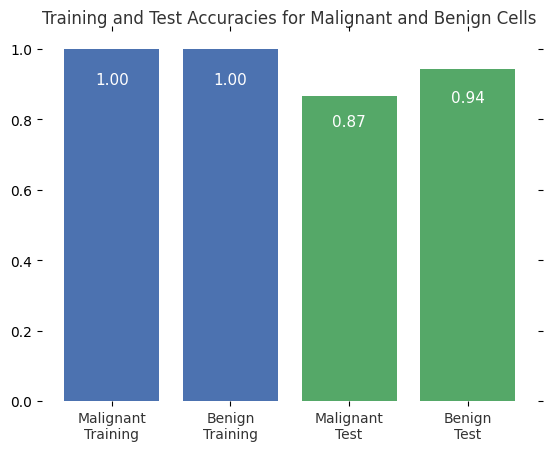

In [221]:
#Call the plotting function to see the visualization.
accuracy_plot()